## Example 1: Finding patterns in data

In [3]:
import pandas as pd
import numpy as np

traffic = pd.read_csv('Fremont_Bridge_Bicycle_Counter.csv', index_col = 'Date', parse_dates=True)

In [5]:
table = pd.pivot_table(traffic, 
                      values = 'Fremont Bridge Total',
                      index = traffic.index.time,
                      columns=traffic.index.date)

In [6]:
# count missing values
table.isna().sum().sum()

14

In [7]:
# fill missing values
table.fillna(method='ffill', # forward fill method
            axis=1,
            inplace=True)

<AxesSubplot:title={'center':'hourly bycicle traffic'}, xlabel='time'>

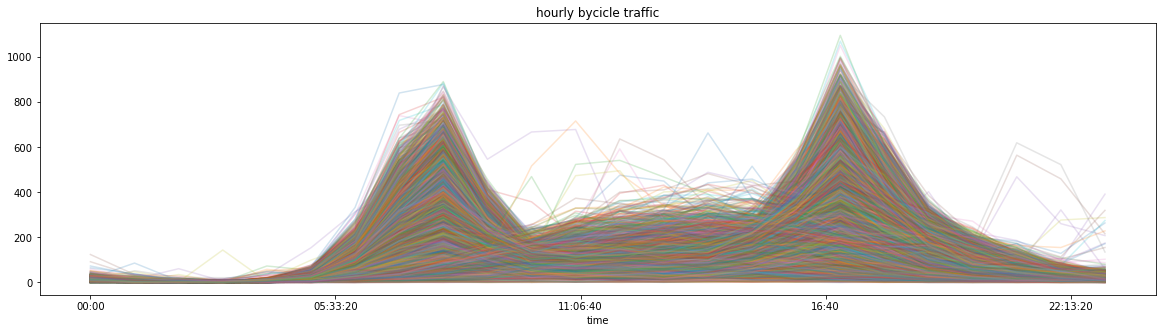

In [9]:
table.plot(legend=False,
         alpha=0.2,
         figsize=(20,5),
         title='hourly bicycle traffic')

In [12]:
days = table.T # Transpose, swaps the columns and index
days

,00:00:00,01:00:00,02:00:00,03:00:00,04:00:00,05:00:00,06:00:00,07:00:00,08:00:00,09:00:00,...,14:00:00,15:00:00,16:00:00,17:00:00,18:00:00,19:00:00,20:00:00,21:00:00,22:00:00,23:00:00
2012-10-03,13.0,10.0,2.0,5.0,7.0,31.0,155.0,352.0,437.0,276.0,...,128.0,164.0,315.0,583.0,380.0,128.0,80.0,63.0,49.0,17.0
2012-10-04,18.0,3.0,9.0,3.0,8.0,26.0,142.0,319.0,418.0,241.0,...,119.0,147.0,275.0,507.0,378.0,164.0,83.0,70.0,46.0,41.0
2012-10-05,11.0,8.0,7.0,4.0,9.0,25.0,105.0,319.0,370.0,212.0,...,125.0,164.0,310.0,434.0,316.0,115.0,68.0,42.0,36.0,32.0
2012-10-06,15.0,15.0,9.0,3.0,5.0,5.0,27.0,33.0,105.0,114.0,...,203.0,211.0,183.0,180.0,96.0,78.0,43.0,33.0,34.0,34.0
2012-10-07,11.0,17.0,3.0,6.0,3.0,9.0,17.0,26.0,69.0,103.0,...,241.0,231.0,225.0,191.0,113.0,49.0,55.0,47.0,18.0,16.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-09-26,5.0,7.0,5.0,2.0,8.0,29.0,125.0,229.0,362.0,209.0,...,128.0,211.0,290.0,478.0,348.0,151.0,73.0,55.0,31.0,18.0
2022-09-27,9.0,2.0,1.0,3.0,11.0,29.0,110.0,320.0,419.0,245.0,...,132.0,218.0,352.0,587.0,345.0,161.0,77.0,71.0,49.0,17.0
2022-09-28,6.0,2.0,1.0,2.0,9.0,23.0,107.0,250.0,381.0,199.0,...,80.0,162.0,302.0,469.0,277.0,175.0,60.0,45.0,33.0,18.0
2022-09-29,16.0,1.0,3.0,3.0,11.0,21.0,104.0,255.0,399.0,221.0,...,136.0,223.0,337.0,556.0,381.0,159.0,81.0,62.0,41.0,33.0


In [13]:
# cluster the days based on traffic
from sklearn.cluster import KMeans


## Review on elbows
- inertia = distance from center of a cluster
- In a plot of y = intertias and x = number of points,
- The eblow is the number of clusters when inertia sharply drops

Text(0, 0.5, 'inertia')

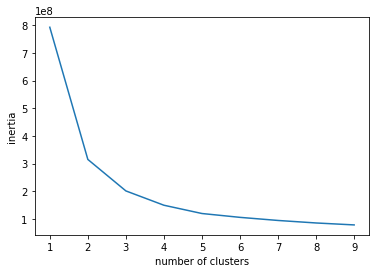

In [18]:
import matplotlib.pyplot as plt

# eblow method (to find # of clusters?)
inertias = []
for k in range(1,10):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(days)
    inertias.append(kmeans.inertia_)
plt.plot(range(1,10), inertias)
plt.xlabel('number of clusters')
plt.ylabel('inertia')

In [19]:
# From plot above, the eblow is 2. k=2,3,4 are good choices

In [20]:
k=4
kmeans=KMeans(n_clusters=k)
kmeans.fit(days)

KMeans(n_clusters=4)

In [21]:
# cluster centers
centers = kmeans.cluster_centers_
centers.shape # We have 4 clusters among 24 hours in a day

(4, 24)

                  0          1         2         3
00:00:00  17.446880  12.008255  7.680732  8.440714
01:00:00   9.752108   5.754717  3.822452  4.902413
02:00:00   6.205734   3.759434  2.581210  3.235047


<AxesSubplot:xlabel='time'>

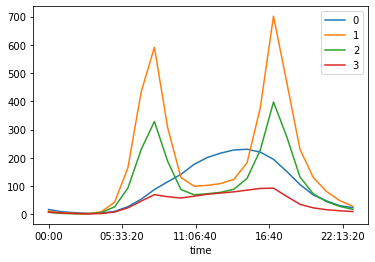

In [25]:
# put clusters in a dataframe
clusters_centers = pd.DataFrame(centers.T, index=table.index) # transpose so each column is a center
print(clusters_centers.head(3))
clusters_centers.plot()

- From plot above, we think 0 and 1 are traffic before covid while 2 and 3 are post covid

In [29]:
# how big are clusters of each type
cluster_labels = kmeans.labels_
np.bincount(cluster_labels)

array([ 593,  848, 1256,  953], dtype=int64)

<AxesSubplot:title={'center':'hourly bycicle traffic'}, xlabel='time'>

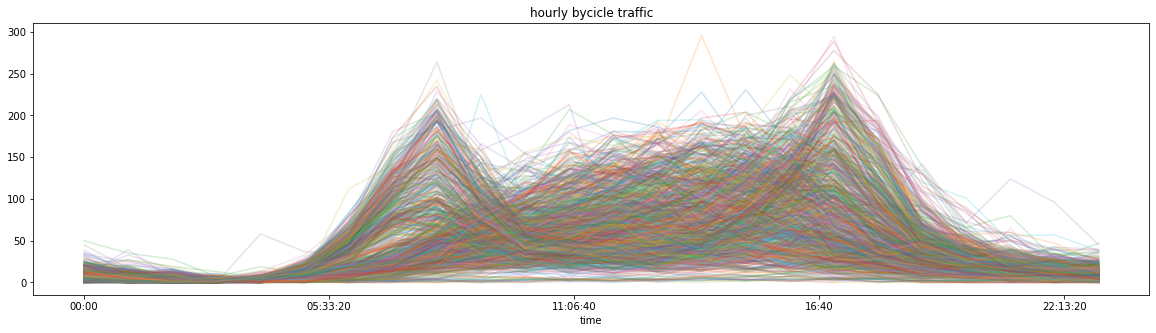

In [38]:
# Plot the cluster
cluster = 3
table.loc[:,cluster_labels==cluster].plot(legend=False,
                                         alpha=0.2,
                                         figsize=(20,5),
                                         title='hourly bycicle traffic'

)

- From plot above, 3 is the most noisy cluster and could be split up

# Example 2: Image/color segmentation

In [39]:
path = 'https://raw.githubusercontent.com/um-perez-alvaro/Data-Science-Practice/master/Data/Tova_the_cat.png'
image = plt.imread(path)

C:\Users\Derrick\AppData\Local\Temp\ipykernel_18072\500867450.py:2: MatplotlibDeprecationWarning: Directly reading images from URLs is deprecated since 3.4 and will no longer be supported two minor releases later. Please open the URL for reading and pass the result to Pillow, e.g. with ``np.array(PIL.Image.open(urllib.request.urlopen(url)))``.
  image = plt.imread(path)


In [40]:
image.shape

(220, 294, 3)

(-0.5, 293.5, 219.5, -0.5)

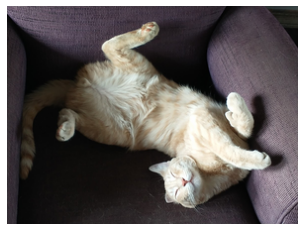

In [44]:
plt.imshow(image)
plt.axis(False)

- From above we have 220x294 pixels. The image can be split into 3 values, RGB
- Each pixel is a 3D vector that holds RGB values
- We will cluster the piels based on color intensities

In [74]:
X = image.reshape(220*294,3)
k = 7
kmeans = KMeans(n_clusters=k)
kmeans.fit(X)

KMeans(n_clusters=7)

In [63]:
centers = kmeans.cluster_centers_
labels = kmeans.labels_

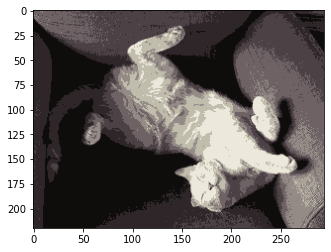

In [64]:
# replace each color with its cluster center
segmented_image = centers[labels].reshape(220,294,3)
plt.imshow(segmented_image) # segmented_image uses a finite number of colors

# Example 3: topic modelling

In [65]:
from sklearn.datasets import fetch_20newsgroups
from sklearn.cluster import KMeans

In [67]:
categories = [
    'alt.atheism',
    'comp.windows.x',
    'rec.autos',
    'rec.sport.baseball',
    'sci.electronics',
    'sci.space'
]

docs = fetch_20newsgroups(subset='all', categories=categories, remove=['headers', 'footers', 'quotes'])

In [69]:
data = pd.DataFrame({'text': docs['data'],
                    'category': docs['target']})
data

,text,category
0,\n McDonnell Douglas rolls out DC-X\n\n ...\...,5
1,\nPortuguese launch complex??? Gosh.... Polish...,5
2,^^^...,4
3,[reply to jimh@carson.u.washington.edu (James ...,0
4,Let's look at the effects of inflation on 1930...,3
...,...,...
5737,\n\n\n\n\n\n\n\n\tThe Viper isn't an Inline 10...,2
5738,[reply to tgk@cs.toronto.edu (Todd Kelley)]\n ...,0
5739,,2
5740,\n\n\nWell ...\nHave a look at a new journal: ...,5


In [76]:
print(data[data.category==5].iloc[5].text)

Comet P/Helin-Roman-Crockett also spent some time as a temporary
satellite to Jupiter a few years ago if you believe the calculations
by Tancredi, G., Lindgren, M. and  Rickman, H.(Astron. Astrophys., 
239, pp. 375-380, 1990).
-- 


-------------------------------------------------------------


- Goal is to discover that latent "topics" that occur in a collection of documents

In [82]:
# preprocessing text
# here we use a function from Javi

# preprocess docs
import nltk 
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet
# UNCOMMENT THESE TO DOWNLOAD
#nltk.download('wordnet')  
#nltk.download('stopwords')
#nltk.download('punkt')
#nltk.download('averaged_perceptron_tagger')
#nltk.download('omw-1.4')

lemmatizer = WordNetLemmatizer()

def process_pos(pos):
    if pos.startswith('J'): # adjectives
        return wordnet.ADJ
    elif pos.startswith('V'): # verbes
        return wordnet.VERB
    elif pos.startswith('N'): # nouns
        return wordnet.NOUN
    elif pos.startswith('R'): # adverbs
        return wordnet.ADV
    else:
        return wordnet.NOUN
    
from nltk.corpus import stopwords
stop_words = stopwords.words('english')

import string
punctuation = [punc for punc in string.punctuation]

def process_text(text):
    words = word_tokenize(text)
    words = [word.lower() for word in words]
    lemmatized_words = [lemmatizer.lemmatize(word, pos=process_pos(pos)) 
                        for word,pos in nltk.pos_tag(words) 
                        if word not in stop_words # remove stop words
                        and word not in punctuation # remove punctuations
 ] 
    return ' '.join(lemmatized_words)

In [79]:
docs['target_names']

['alt.atheism',
 'comp.windows.x',
 'rec.autos',
 'rec.sport.baseball',
 'sci.electronics',
 'sci.space']

In [84]:
data['preprocessed_text'] = data.text.apply(process_text)
data.head(2)

,text,category,preprocessed_text
0,\n McDonnell Douglas rolls out DC-X\n\n ...\...,5,mcdonnell douglas roll dc-x ... ssto research ...
1,\nPortuguese launch complex??? Gosh.... Polish...,5,portuguese launch complex gosh .... polish ame...


In [85]:
data.preprocessed_text.loc[1]

'portuguese launch complex gosh .... polish american way portuguese brazilian brazil joke portuguese space agency want send portuguese astronaut surface sun thing solve problem send man surface sun simple ... astronaut travel night ... c.o.egalon larc.nasa.gov c.o.egalon larc.nasa.gov'

In [86]:
# word frequencies
from sklearn.feature_extraction.text import TfidfVectorizer
vect = TfidfVectorizer(max_df=0.9, max_features=10_000) # drop words in 90% of texts


In [87]:
from sklearn.pipeline import Pipeline
pipe = Pipeline(steps=[
    ('vect', vect),
    ('clustering', KMeans(n_clusters=15))
])

In [88]:
pipe.fit(data.preprocessed_text)

Pipeline(steps=[('vect', TfidfVectorizer(max_df=0.9, max_features=10000)),
                ('clustering', KMeans(n_clusters=15))])

In [ ]:
KMeans.

In [93]:
# check if clusters = topics? (essentially, words related to topics)
words_df = pd.DataFrame(pipe['vect'].transform(data.preprocessed_text).toarray(),
                       columns=pipe['vect'].get_feature_names_out())
words_df

,00,000,00000,0060,007,01,0123456789,015,02,02139,...,zip,zo,zodiacal,zok,zone,zoo,zoom,zt,zupcic,zx
0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.514835,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5737,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5738,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5739,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5740,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [94]:
cluster_label = pipe['clustering'].labels_

In [100]:
# top 10 words in a cluster
cluster = 0
# for cluster 0 text, get mean frequency of each word
# get list of top 10 most frequent words
words_df.loc[cluster_label==cluster].mean().sort_values(ascending=False).head(10).index.to_list() 

['year',
 'player',
 'team',
 'baseball',
 'league',
 'last',
 'good',
 'stats',
 'career',
 'think']

In [103]:
# top 10 words in each cluster
for i in range(15):
    print('cluster: '+str(i))
    print(words_df.loc[cluster_label==i].mean().sort_values(ascending=False).head(10).index.to_list())
    print('--------------------')

cluster: 0
['year', 'player', 'team', 'baseball', 'league', 'last', 'good', 'stats', 'career', 'think']
--------------------
cluster: 1
['one', 'know', 'use', 'edu', 'would', 'anyone', 'get', 'good', 'think', 'like']
--------------------
cluster: 2
['widget', 'motif', 'use', 'gl', 'call', 'window', 'application', 'athena', 'code', 'null']
--------------------
cluster: 3
['window', 'thanks', 'server', 'use', 'please', 'run', 'file', 'mail', 'display', 'program']
--------------------
cluster: 4
['god', 'religion', 'say', 'atheist', 'believe', 'one', 'belief', 'people', 'claim', 'moral']
--------------------
cluster: 5
['use', 'chip', 'would', 'circuit', 'one', 'line', 'copy', 'work', 'output', 'power']
--------------------
cluster: 6
['battery', 'temperature', 'concrete', 'water', 'heat', 'discharge', 'tower', 'cool', 'plant', 'power']
--------------------
cluster: 7
['ico', 'bobbe', 'manhattan', 'beauchaine', 'bronx', 'tek', 'queen', 'vice', 'sea', 'sink']
--------------------
cluster: 

## Example 4: customer segmentation